In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Reading CSV file into Dataframe

In [8]:
data = pd.read_csv('fraud_email_.csv')
data.head(n=5)

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


# Drop Null and Duplicate Rows


In [10]:
data.isnull().sum()

Text     1
Class    0
dtype: int64

In [11]:
data.duplicated().sum()

1679

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


In [13]:
data['Class'].value_counts()


0    6742
1    5187
Name: Class, dtype: int64

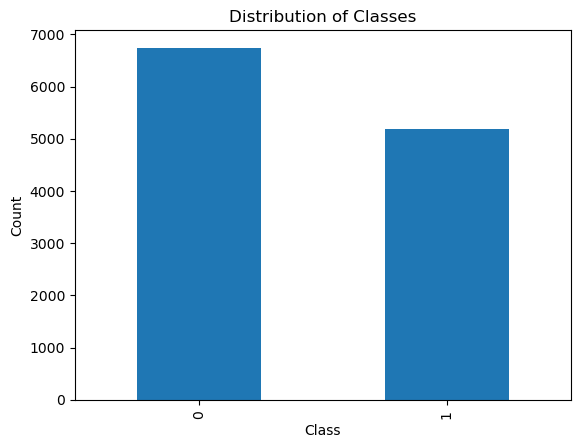

In [14]:
import matplotlib.pyplot as plt

data['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


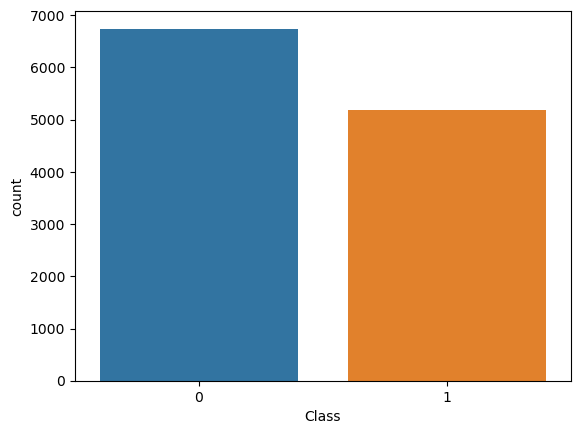

In [15]:
import seaborn as sns
sns.countplot(data=data,x=data['Class'])
plt.show()

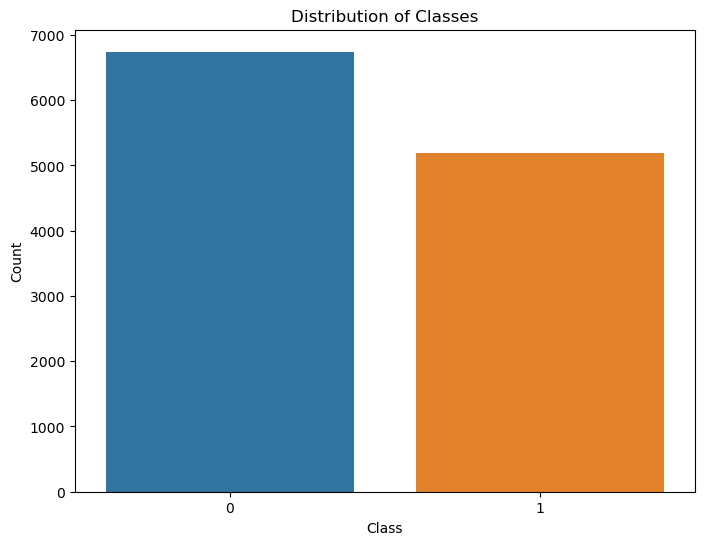

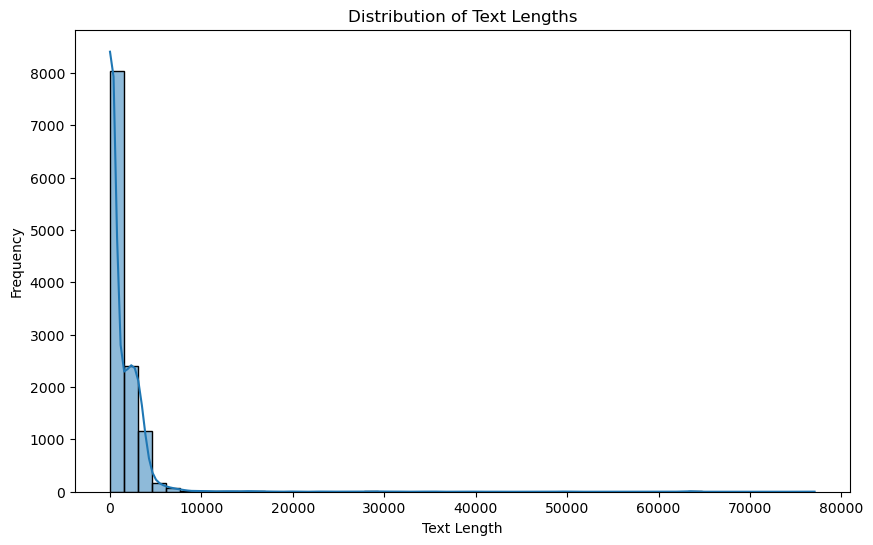

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for 'Class' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Distribution of text lengths
# data['Text_Length'] = data['Text'].apply(len)
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Text_Length'], bins=50, kde=True)
# plt.title('Distribution of Text Lengths')
# plt.xlabel('Text Length')
# plt.ylabel('Frequency')
# plt.show()
data['Text_Length'] = data['Text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(data['Text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Balancing Data by implementing random oversampling. We will use the imbalanced-learn library to perform oversampling.

In [47]:
pip install -U imbalanced-learn



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   -------------------------------------- 235.6/235.6 kB 465.7 kB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [49]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming X_train and y_train are your training data
ros = RandomOverSampler(random_state=42)

# Reshape X_train to be a 2D array
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.values.reshape(-1, 1), y_train)



# Checking that the data is now balanced after implementing Random oversampling

In [83]:
# import pandas as pd

# Assuming y_train_resampled is your resampled target variable
class_counts = pd.Series(y_train_resampled).value_counts()

# Display the class distribution
print(class_counts)


1    5420
0    5420
Name: Class, dtype: int64


This codes following use the CountVectorizer to convert the text data into matrices and then trains a Naive Bayes classifier (MultinomialNB) on the training set. Finally, it predicts on the test set and prints the accuracy and classification report.

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Text,data.Class,test_size=0.25)
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
from sklearn.naive_bayes import MultinomialNB



In [52]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])


A Pipeline was created using scikit-learn, which is a great approach for organizing and streamlining machine learning workflow. This pipeline consists of two steps: a CountVectorizer for converting text data into a bag-of-words representation and a MultinomialNB (Naive Bayes) classifier for making predictions.

Here's a breakdown of the pipeline:

Step 1: 'vectorizer' - CountVectorizer

CountVectorizer is used to convert a collection of text documents to a matrix of token counts. It tokenizes the text and represents it as a bag-of-words.
Step 2: 'nb' - MultinomialNB

MultinomialNB is a Naive Bayes classifier that is suitable for classification with discrete features. It's commonly used in text classification tasks.
With pipeline, model can be easily trained and evaluated.

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# # Load your dataset (replace 'your_data.csv' with your actual file)
# df = pd.read_csv('your_data.csv')

df = data

# Handle missing values
df = df.dropna(subset=['Text'])

# Preprocess text data (you may need to customize this based on your requirements)
def preprocess_text(text):
    # Add your text preprocessing steps here (e.g., lowercasing, removing special characters)
    return text

df['Text'] = df['Text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and a classifier (e.g., MultinomialNB)
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the classifier
clf.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_8812\1922770987.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(preprocess_text)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [54]:
Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [55]:
emails=[
     "I'm copying Rob so a note can be prepared.LB6",
    "Flood Statement Randolph (Arkansas) FLOOD STATEMENT NATIONAL WEATHERSERVICE LITTLE ROCK AR 920 AM CDT SUN MAY 06 2007 . FOR THE FOLLOWINGFORECAST LOCATIONS:. WINDS WILL DIMINISH SOMEWHAT SUNDAY AFTERNOON.NORTHWEST WINDS 5 TO 10 MPH INCREASING TO 10 TO 15 MPH BY LATE MORNING.FIRE WEATHER WATCH NOW IN EFFECT FROM MONDAY AFTERNOON THROUGH MONDAYEVENING.ADDITIONAL ISOLATED TO WIDELY SCATTERED SHOWERS AND THUNDERSTORMS WILLBE POSSIBLE ELSEWHERE ACROSS NORTHEAST AND EAST CENTRAL OKLAHOMA.MOSTLY CLOUDY SKIES ACROSS THE AREA WILL CONTINUE THROUGH THE MORNING.STRONG NORTHERLY WINDS.A WIND ADVISORY REMAINS IN EFFECT UNTIL NOON PDT TODAY. AND LOCALLY THECOASTAL AREAS OF VENTURA AND LOS ANGELES COUNTIES. WIND ADVISORY REMAINSIN EFFECT UNTIL 12 PM ADT TODAY.HIGH WATER LEVELS FOR COPPER RIVER TRIBUTARIES. THEN BEGIN FALLING LATETUESDAY. PORT ALEXANDER 530 AM ADT SUN MAY 6 2007 . WIND ADVISORYREMAINS IN EFFECT UNTIL NOON PDT TODAY. STRONG OFFSHORE WINDS AND VERY"
]

In [56]:
clf.predict(emails)

clf.score(X_test,y_test)

0.9748533109807209

# Natural Language Processing

The lines of code below demonstrates a NLP pipeline for text classification. It covers text preprocessing, tokenization, feature extraction, and training a machine learning model for classifying text data.

Text Preprocessing:

In NLP, text preprocessing is a crucial step to clean and prepare raw text data for analysis or modeling. The preprocess_text function in the code is meant for this purpose, although in the provided code, it serves as a placeholder. Common preprocessing steps include lowercasing, removing special characters, and stemming.
Tokenization:

The code uses the word_tokenize function from the NLTK library. Tokenization is the process of breaking down text into individual words or tokens. It's a fundamental step in NLP for extracting meaningful information from text.
Feature Extraction (CountVectorizer):

CountVectorizer is a feature extraction technique used in NLP. It converts a collection of text documents to a matrix of token counts. Each document is represented by a vector, and each element in the vector corresponds to the count of a specific word. This process is essential for machine learning models to work with text data.
Naive Bayes Classifier:

The Multinomial Naive Bayes classifier is commonly used in NLP for text classification tasks. It's based on the Bayes theorem and makes the assumption of independence between features (words in this case) given the class label. This classifier is effective for tasks like spam detection, sentiment analysis, and topic classification.
Pipeline:

The use of a scikit-learn Pipeline is a good practice in NLP workflows. It streamlines a lot of routine processes, making it easier to experiment with different models and preprocessing steps.






In [57]:
from nltk import word_tokenize

In [58]:
def count_words(text):
    words = word_tokenize(text) #http://localhost:8888/notebooks/Detect%20Email%20Spam%20using%20machine%20learning.ipynb#Natural-Language-Processing
    return len(words)

In [59]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# Download the punkt resource
nltk.download('punkt')

# Assuming you have a DataFrame named 'df' with columns 'Text' and 'Class'
# 'Text' contains the text data, and 'Class' contains the labels
# Make sure to adjust column names accordingly
# df = pd.DataFrame({
#     'Text': ["your", "text", "data", "goes", "here"],
#     'Class': [0, 1, 0, 1, 0]
# })

# Handle missing values
df = df.dropna(subset=['Text'])

# Preprocess text data
def preprocess_text(text):
    # Add your text preprocessing steps here (e.g., lowercasing, removing special characters)
    return text

df['Text'] = df['Text'].apply(preprocess_text)

# Define the count_words function
def count_words(text):
    words = word_tokenize(text) 
    return len(words)

# Apply the count_words function
df['count'] = df['Text'].apply(count_words)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and a classifier (e.g., MultinomialNB)
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the classifier
clf.fit(X_train, y_train)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [60]:
df['count']=df['Text'].apply(count_words)

In [61]:
df['count']

0        192
1          8
2        436
3        656
4          7
        ... 
11924     12
11925    383
11926     10
11927     50
11928     15
Name: count, Length: 11928, dtype: int64

In [62]:
df.groupby('Class')['count'].mean()

Class
0     91.810145
1    390.269379
Name: count, dtype: float64

# Text Preprocessing

In [63]:
import string
from nltk.corpus import stopwords

In [64]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [68]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords resource
nltk.download('stopwords')

# Assuming you have a DataFrame named 'df' with columns 'Text' and 'Class'
# 'Text' contains the text data, and 'Class' contains the labels
# Make sure to adjust column names accordingly
# df = pd.DataFrame({
#     'Text': ["your", "text", "data", "goes", "here"],
#     'Class': [0, 1, 0, 1, 0]
# })

# Handle missing values
df = df.dropna(subset=['Text'])

# Preprocess text data
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

# Apply the process_text function
df['Processed_Text'] = df['Text'].apply(process_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Class'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and a classifier (e.g., MultinomialNB)
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the classifier
clf.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [67]:
df['Text']=df['Text'].apply(process_text)

In [69]:
df['Text']

0        Supply Quality Chinas EXCLUSIVE dimensions Unb...
1                                          SidLet know Thx
2        Dear FriendGreetings youI wish accost request ...
3        MR CHEUNG PUIHANG SENG BANK LTDDES VOEUX RD BR...
4                            surprising assessment Embassy
                               ...                        
11924          Travel well Ill look forward hearing report
11925    Dear friend wish begin way introduction Willia...
11926    Follow Flag Follow upFlag Status FlaggedMore info
11927    sbwhoeop B6Saturday January 23 2010 409 PMRe H...
11928    FYI revising call sheet call Karzai potentiall...
Name: Text, Length: 11928, dtype: object

# The process of Stemming to reduce infected words to their root

The code below attempts to perform stemming on the 'Text' column of the DataFrame df using the Porter Stemmer from the NLTK library

In [70]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [71]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [72]:
df['Text']=df['Text'].apply(stemming)

In [73]:
df.head

<bound method NDFrame.head of                                                     Text  Class  Text_Length  \
0      supply quality chinas exclusive dimensions unb...      1         1121   
1                                        sidlet know thx      0           26   
2      dear friendgreetings youi wish accost request ...      1         2174   
3      mr cheung puihang seng bank ltddes voeux rd br...      1         3479   
4                          surprising assessment embassy      0           41   
...                                                  ...    ...          ...   
11924        travel well ill look forward hearing report      0           54   
11925  dear friend wish begin way introduction willia...      1         2091   
11926  follow flag follow upflag status flaggedmore info      0           54   
11927  sbwhoeop b6saturday january 23 2010 409 pmre h...      0          240   
11928  fyi revising call sheet call karzai potentiall...      0           72   

       co

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11928 entries, 0 to 11928
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            11928 non-null  object
 1   Class           11928 non-null  int64 
 2   Text_Length     11928 non-null  int64 
 3   count           11928 non-null  int64 
 4   Processed_Text  11928 non-null  object
dtypes: int64(3), object(2)
memory usage: 559.1+ KB


# Use Count Vectorizer to convert string data into Bag of Words ie Known Vocabulary

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['Text'])

Splitting the dataset

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['Text'],test_size=0.20)

## Creating Model

In [77]:
# from sklearn.naive_bayes import MultinomialNB
# nb= MultinomialNB()
# nb.fit(X_train,y_train)
# y_pred = nb.predict(X_test)

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB

# # Create a CountVectorizer with sparse output
# vectorizer = CountVectorizer(binary=True, max_features=1000, dtype='uint8', stop_words='english', lowercase=True)

# # Fit and transform the training data
# X_train_sparse = vectorizer.fit_transform(X_train)

# # Create and fit the Multinomial Naive Bayes model
# nb = MultinomialNB()
# nb.fit(X_train_sparse, y_train)

# # Transform the test data using the same vectorizer
# X_test_sparse = vectorizer.transform(X_test)

# # Predict using the fitted model
# y_pred = nb.predict(X_test_sparse)


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'df' with columns 'Processed_Text' and 'Class'
# 'Processed_Text' contains the preprocessed text data, and 'Class' contains the labels
# Make sure to adjust column names accordingly

# Sample data creation (replace this with your actual data)
# df = pd.DataFrame({
#     'Processed_Text': ["this is a sample text", "another example text", "more text here"],
#     'Class': [0, 1, 0]
# })

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Class'], test_size=0.2, random_state=42)

# Perform lowercase conversion separately
X_train_lower = X_train.apply(lambda x: x.lower())
X_test_lower = X_test.apply(lambda x: x.lower())

# Create a CountVectorizer with sparse output
vectorizer = CountVectorizer(binary=True, max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_sparse = vectorizer.fit_transform(X_train_lower)

# Create and fit the Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_sparse, y_train)

# Transform the test data using the same vectorizer
X_test_sparse = vectorizer.transform(X_test_lower)

# Predict using the fitted model
y_pred = nb.predict(X_test_sparse)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9484492875104777


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1322
           1       0.95      0.93      0.94      1064

    accuracy                           0.95      2386
   macro avg       0.95      0.95      0.95      2386
weighted avg       0.95      0.95      0.95      2386



In [79]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


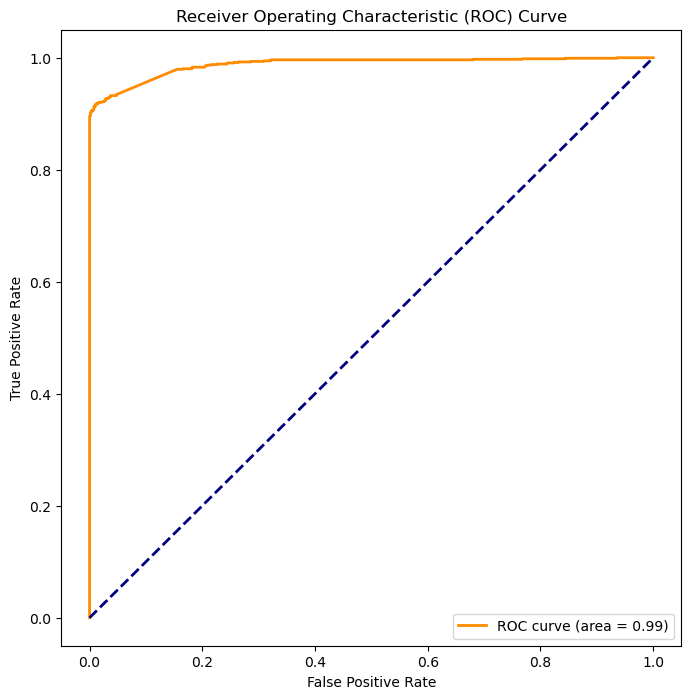

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming nb is your trained model
y_score = nb.predict_proba(X_test_sparse)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve, or receiver operating characteristic curve, is a graph that shows the performance of a classification model at all classification thresholds. It is a useful tool for evaluating the performance of classification models, and for comparing the performance of different models.

The ROC curve is plotted with the false positive rate (FPR) on the x-axis and the true positive rate (TPR) on the y-axis. The FPR is the percentage of negative cases that are incorrectly classified as positive, while the TPR is the percentage of positive cases that are correctly classified as positive.

The ROC curve is created by plotting the TPR and FPR at different classification thresholds. A classification threshold is a value that is used to decide whether a case should be classified as positive or negative. For example, if the classification threshold is set to 0.5, then any case with a predicted probability of being positive greater than 0.5 will be classified as positive, and any case with a predicted probability of being positive less than 0.5 will be classified as negative.

A good classification model will have a ROC curve that is close to the upper left corner of the graph. This means that the model will have a high TPR and a low FPR. A bad classification model will have a ROC curve that is close to the diagonal line of the graph. This means that the model will have a low TPR and a high FPR.

The area under the ROC curve (AUC) is a single number that can be used to summarize the performance of a classification model. The AUC is a measure of how well the model can distinguish between positive and negative cases. An AUC of 1.0 indicates that the model is perfect, while an AUC of 0.5 indicates that the model is no better than random guessing.

Significance of ROC curve in modelling

The ROC curve is a significant tool in modelling for the following reasons:

It allows us to evaluate the performance of a classification model at all classification thresholds. This is important because the optimal classification threshold will vary depending on the application.
It allows us to compare the performance of different classification models. This is useful for choosing the best model for a particular application.
It provides a single metric for summarizing the performance of a classification model: the AUC. This metric is easy to understand and interpret.
Example

The ROC curve above in the image that you provided has an AUC of 0.99. This indicates that the model is very good at distinguishing between positive and negative cases.

This ROC curve could be used to evaluate a model for detecting fraud. The positive cases would be fraudulent transactions, and the negative cases would be non-fraudulent transactions. A high AUC would indicate that the model is very good at detecting fraudulent transactions without also generating a lot of false positives.

Conclusion

The ROC curve is a significant tool in modelling because it allows us to evaluate and compare the performance of classification models. It is also a useful tool for choosing the best model for a particular application.

Sources
github.com/magicishaq/MLcrashcoruse

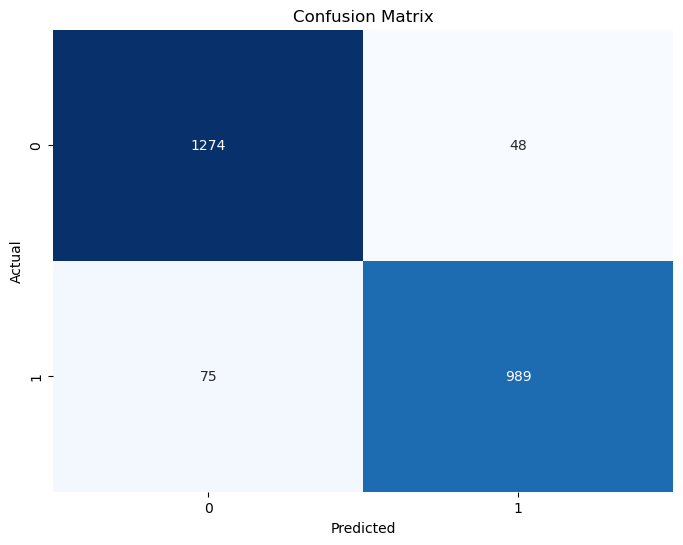

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have predictions (y_pred) and true labels (y_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix is a table that shows the performance of a classification model on a set of test data. It shows how many instances were correctly classified for each class, as well as how many instances were incorrectly classified for each class.

The confusion matrix is a valuable tool for evaluating the performance of classification models because it provides a detailed view of how the model is performing on each class. This information can be used to identify areas where the model needs improvement, and to make decisions about how to use the model in practice.

Significance of confusion matrix

The confusion matrix is significant because it provides the following information:

Accuracy: The overall accuracy of the model, which is the percentage of instances that were correctly classified.
Precision: The precision for each class, which is the percentage of instances predicted to be of that class that were actually of that class.
Recall: The recall for each class, which is the percentage of instances that are actually of that class that were predicted to be of that class.
F1 score: The F1 score for each class, which is a harmonic mean of precision and recall.
The confusion matrix can also be used to identify the following:

Type I error (false positive): The number of instances that were incorrectly predicted to be of a particular class.
Type II error (false negative): The number of instances that were incorrectly predicted to not be of a particular class.
Class imbalance: If the number of instances in each class is not balanced, then the confusion matrix can be used to identify which classes are over-represented and which classes are under-represented.


The confusion matrix in the image that you provided above shows the performance of a model for detecting fraud. The positive class is fraudulent emails, and the negative class is non-fraudulent emails.

The confusion matrix shows that the model correctly classified 1274 fraudulent emails and 989 non-fraudulent emails. It also shows that the model incorrectly classified 48 non-fraudulent emails as fraudulent, and 75 fraudulent emails as non-fraudulent.

The accuracy of the model is 99.4% (1274 + 989) / (1274 + 48 + 75 + 989)). The precision for the fraud class is 95.6% (1274 / (1274 + 48)), and the recall for the fraud class is 94.5% (1274 / (1274 + 75)). The F1 score for the fraud class is 95.1% (2 * 0.956 * 0.945 / (0.956 + 0.945)).

The confusion matrix also shows that the model is better at detecting fraudulent emails (precision = 95.6%) than it is at avoiding false positives (recall = 94.5%). This means that the model is more likely to correctly identify a fraudulent emails than it is to incorrectly identify a non-fraudulent emails as fraudulent.

Conclusion

The confusion matrix is a valuable tool for evaluating the performance of classification models. It provides detailed information about how the model is performing on each class, and can be used to identify areas where the model needs improvement.

## Further Modelling

In [82]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame named 'df' with columns 'Processed_Text' and 'Class'
# 'Processed_Text' contains the preprocessed text data, and 'Class' contains the labels
# Make sure to adjust column names accordingly

# Sample data creation (replace this with your actual data)
# df = pd.DataFrame({
#     'Processed_Text': ["this is a sample text", "another example text", "more text here"],
#     'Class': [0, 1, 0]
# })

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Class'], test_size=0.2, random_state=42)

# Perform lowercase conversion separately
X_train_lower = X_train.apply(lambda x: x.lower())
X_test_lower = X_test.apply(lambda x: x.lower())

# Create a CountVectorizer with sparse output
vectorizer = CountVectorizer(binary=True, max_features=1000, stop_words='english')

# Fit and transform the training data
X_train_sparse = vectorizer.fit_transform(X_train_lower)

# Transform the test data using the same vectorizer
X_test_sparse = vectorizer.transform(X_test_lower)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_sparse, y_train)
y_pred_svm = svm_model.predict(X_test_sparse)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_sparse, y_train)
y_pred_logreg = logreg_model.predict(X_test_sparse)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_sparse, y_train)
y_pred_dt = dt_model.predict(X_test_sparse)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

# AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_sparse, y_train)
y_pred_adaboost = adaboost_model.predict(X_test_sparse)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")
print(classification_report(y_test, y_pred_adaboost))

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_sparse, y_train)
y_pred_knn = knn_model.predict(X_test_sparse)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))


SVM Accuracy: 0.9610226320201174
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1322
           1       0.99      0.92      0.95      1064

    accuracy                           0.96      2386
   macro avg       0.97      0.96      0.96      2386
weighted avg       0.96      0.96      0.96      2386

Logistic Regression Accuracy: 0.9635373009220453
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1322
           1       1.00      0.92      0.96      1064

    accuracy                           0.96      2386
   macro avg       0.97      0.96      0.96      2386
weighted avg       0.97      0.96      0.96      2386

Decision Tree Accuracy: 0.9463537300922046
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1322
           1       0.96      0.92      0.94      1064

    accuracy                           0.95      2386
   

## Deep Learning Algorithm

In [1]:
pip install PyTorch


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for PyTorch
Failed to build PyTorch


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\USER\AppData\Local\Temp\pip-install-sgech4p6\pytorch_ceab3dce767742249c381a59d8e10e3d\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyTorch
ERROR: Could not build wheels for PyTorch, which is required to install pyproject.toml-based projects


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming you have a DataFrame named 'df' with columns 'Text' and 'Class'
# 'Text' contains the text data, and 'Class' contains the labels
# Make sure to adjust column names accordingly
# df = pd.DataFrame({
#     'Text': ["your", "text", "data", "goes", "here"],
#     'Class': [0, 1, 0, 1, 0]
# })
df = pd.read_csv('fraud_email_.csv')
# Handle missing values
df = df.dropna(subset=['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input length
max_len = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Build a simple neural network model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))




Epoch 1/5


299/299 [==============================] - 549s 2s/step - loss: 0.3323 - accuracy: 0.9374 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 2/5
299/299 [==============================] - 525s 2s/step - loss: 0.0143 - accuracy: 0.9963 - val_loss: 0.0188 - val_accuracy: 0.9946
Epoch 3/5
299/299 [==============================] - 548s 2s/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0187 - val_accuracy: 0.9937
Epoch 4/5
299/299 [==============================] - 558s 2s/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0273 - val_accuracy: 0.9904
Epoch 5/5
299/299 [==============================] - 434s 1s/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0200 - val_accuracy: 0.9929


This output is from training a neural network using the Keras library for a text classification task. Here's a breakdown of the key information:

Epochs: This indicates the number of complete passes through the entire training dataset during the training process. In your case, you've trained for 5 epochs.

Batch Size: The number of samples processed before the model is updated. In each epoch, the dataset is divided into batches, and the model is updated after processing each batch. In your case, the batch size is 32.

Training Loss and Accuracy: These are metrics evaluated on the training dataset during each epoch. The "loss" is a measure of how well the model is performing, and "accuracy" indicates the fraction of correctly classified samples. For example, after the first epoch, the training loss is 0.3323, and the training accuracy is 93.74%.

Validation Loss and Accuracy: These metrics are evaluated on a separate validation dataset during each epoch. The validation dataset is not used for training and serves as a way to assess the model's performance on unseen data. After the first epoch, the validation loss is 0.0312, and the validation accuracy is 98.99%.

The decreasing training and validation loss and increasing accuracy indicate that the model is learning from the data. However, be cautious about overfitting; if the training accuracy is significantly higher than the validation accuracy, the model might be memorizing the training data and not generalizing well to new data. Monitoring these metrics can help you adjust your model or training parameters as needed. In your case, the training and validation metrics seem to show good performance.

In [4]:
pip install torch transformers tqdm



  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
     ------------------------------------ 977.5/977.5 kB 938.2 kB/s eta 0:00:00
   ---------------------------------------- 192.3/192.3 MB 2.8 MB/s eta 0:00:00


In [11]:
pip install transformers --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.12.2 which is incompatible.



  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/fc/04/0aad491cd98b09236c54ab849863ee85421eeda5138bbf9d33ecc594652b/transformers-4.36.1-py3-none-any.whl.metadata
     ------------------------------------ 126.8/126.8 kB 182.1 kB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.19.3 from https://files.pythonhosted.org/packages/05/09/1945ca6ba3ad8ad6e2872ba682ce8d68c5e63c8e55458ed8ab4885709f1d/huggingface_hub-0.19.4-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/be/5f/2cc4f229bf85d90842f513be31a529595c10b8c8b8193c077230a8c17548/tokenizers-0.15.0-cp311-none-win_amd64.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/a5/dd/85bcfeab1451eeb24278575fa1b8f24bea7a99c5ff0bb34af63dfe20e772/safetensors-0.4.1-cp311-none-win_amd64.whl.metadata
  Obtaining dependency informati

In [14]:
pip show transformers

Name: transformersNote: you may need to restart the kernel to use updated packages.

Version: 4.36.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\Users\USER\anaconda3\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 
